# 3. Data_Pre_processing_Case_Study - 26

### Domain 
- Retail / Fashion 

### Focus 
- Optimize sales

### Business challenge/requirement 

- Fyntra is the largest online clothing company in USA. It sells clothing online, but they also have in-store style and clothing advice sessions. Customers come into the store, have sessions/meetings with a personal stylist, then can go home and order either on a mobile app or website for the clothes they want.
- Company wants to decide whether to focus the effort on mobile app experience or its website. As a drastic measure it is also evaluating to shut down the website.
- You as a ML expert in the team will help the company make the right decision


### Key issues
- Clearly establish a correlation among the parameters supplied in data


### Considerations
- NONE


### Data volume
- Approx 500 records – file FyntraCustomerData.csv (All data is fake so do not worry about privacy)

### Additional information
- NA


### Business benefits
- Increase in profits as the focus on the optimal sales channel will result into the higher top line and the higher bottom line

### Optimize sales
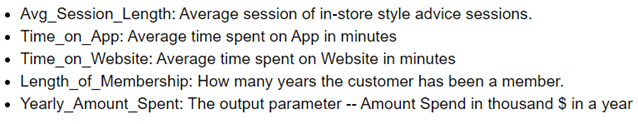

In [ ]:
### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
os.chdir('C:\\Users\\ankit\\OneDrive\\Documents\\Desktop\\DATA SCIENCE\\Top Mentor Lecture\\24_Day_31_7_21\\Case Studies with Answer\\CS 26 Ans -Data Pre-processing-3')
df = pd.read_csv('FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.shape

(500, 8)

### 1.	Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

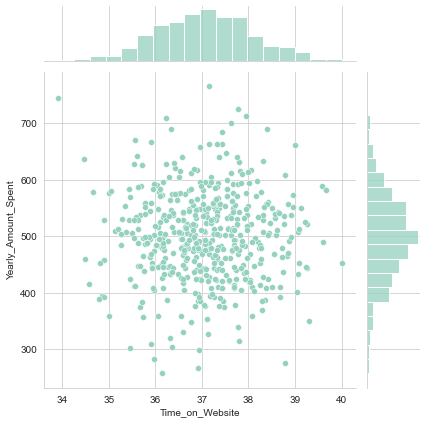

In [84]:
sns.jointplot(data = df, y = "Yearly_Amount_Spent", x = "Time_on_Website")
plt.show()

### 2.	Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?
- Ans :- compare to the above joinplot between 'Time on app' and 'Time on Website' below joinplot between 'Time on App' and 'Yearly Amount Spent' shows correlation stronger 

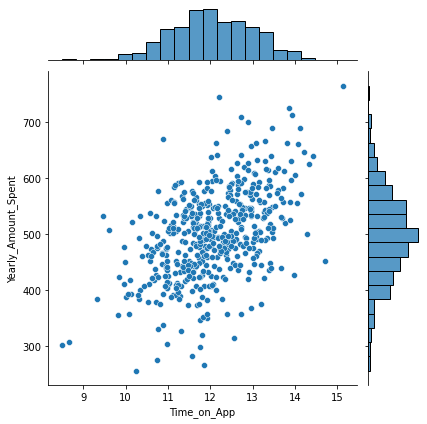

In [11]:
sns.jointplot(data = df, x = 'Time_on_App', y = 'Yearly_Amount_Spent')
plt.show()

### 3.	Compute -- Explore types of relationships across the entire data set using pairplot . Based on this plot what looks to be the most correlated feature with Yearly Amount Spent?
- Ans :- Based on the below plot 'Length of Membership' looks tp be the most correlated feature with 'Yearly Amount Spend'

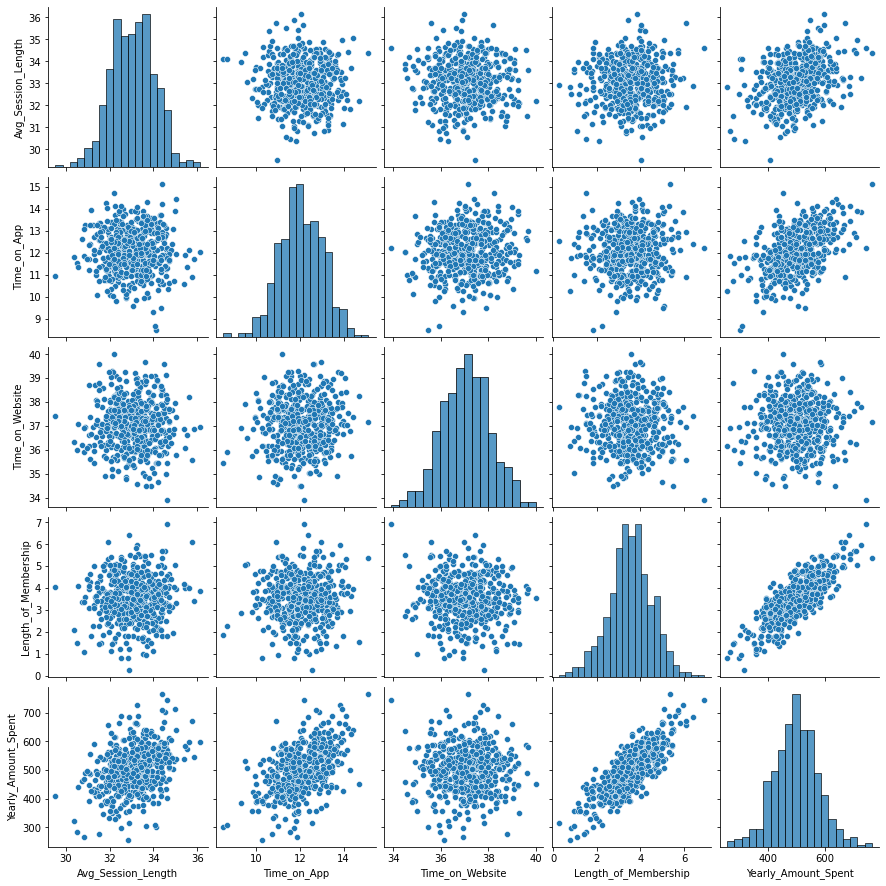

In [13]:
sns.pairplot(df)
plt.show()

### 4.	Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot? – Seaborn LM Plot 
- Ans :- Observing below linear model plot between 'Length of Membership' and 'Yearly Amount Spent', data fits well in linear plot.

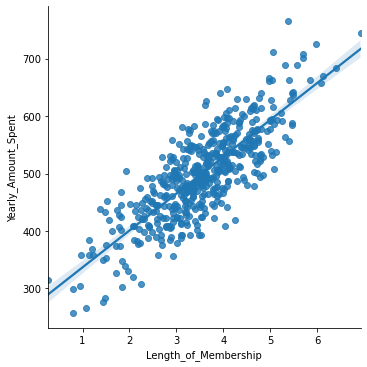

In [15]:
sns.lmplot(data = df, x = 'Length_of_Membership', y = 'Yearly_Amount_Spent')
plt.show()

### 5.	Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?

### spliting data into tarin and test

In [61]:
X = df.iloc[:, 3:-1]
print(X[0:5])

   Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership
0           34.497268    12.655651        39.577668              4.082621
1           31.926272    11.109461        37.268959              2.664034
2           33.000915    11.330278        37.110597              4.104543
3           34.305557    13.717514        36.721283              3.120179
4           33.330673    12.795189        37.536653              4.446308


In [24]:
y = df.iloc[:, -1].values
print(y[0:5])

[587.951054  392.2049334 487.5475049 581.852344  599.406092 ]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 85)

In [29]:
print('Shape of X training is {}'.format(X_train.shape), '&', 'Shape of y training is {}'.format(y_train.shape))

Shape of X training is (400, 4) & Shape of y training is (400,)


In [30]:
print('Sahpe of X test is {}'.format(X_test.shape), '&', 'Shape of y test is {}'.format(y_test.shape))

Sahpe of X test is (100, 4) & Shape of y test is (100,)


### creating model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

### 6.	Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

In [36]:
y_pred = lr.predict(X_test)
print(y_pred[0:20])

[466.95574931 543.54378046 282.97655603 538.74526657 512.39817863
 478.97647861 447.68145376 572.20762017 444.62148369 581.16214455
 431.07300644 481.53084886 507.50489935 554.09682399 562.53344576
 610.12942586 483.76356924 505.5238708  485.59974118 313.76593584]


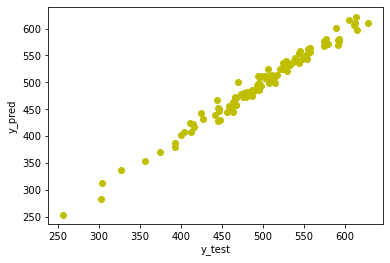

In [40]:
plt.scatter(y_test, y_pred, color = 'y')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### 7.	What is the value of Root Mean Squared Error?

In [42]:
print('coefficient :- ',lr.coef_)
print('intercept :- ',lr.intercept_)

coefficient :-  [25.94725163 39.06682064  0.68253009 61.33469418]
intercept :-  -1071.2205471936832


### RMSE - Root Mean Squared Error

In [44]:
from sklearn.metrics import mean_squared_error

In [55]:
print('RMSE : ',(mean_squared_error(y_test, y_pred)))

RMSE :  95.03600581432407


### Creat a DIST plot

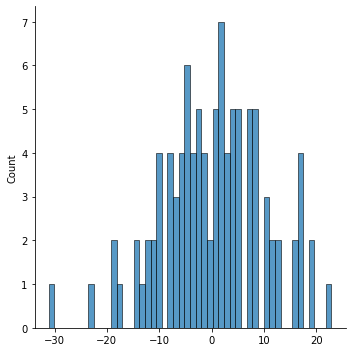

In [58]:
sns.displot((y_test-y_pred), bins = 50)
plt.show()

### Final Question
### 8. Based on coefficients interpret company should focus more on their mobile app or on their website


In [62]:
coeffecients = pd.DataFrame(lr.coef_, X.columns)
coeffecients

,0
Avg_Session_Length,25.947252
Time_on_App,39.066821
Time_on_Website,0.682530
Length_of_Membership,61.334694


In [63]:
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Avg_Session_Length,25.947252
Time_on_App,39.066821
Time_on_Website,0.682530
Length_of_Membership,61.334694


### How can you interpret these coefficients? 
Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 26.08 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 39.18 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.40 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.41 total dollars spent.
- ***Cearly Time On App leads to higher revenue conversion – hence company should focus on App rather than website. Whether company should shutdown the website depends solely on management take on revenue through website***


# PRACTICE

## Import Libraries

In [66]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [67]:
os.chdir('C:\\Users\\ankit\\OneDrive\\Documents\\Desktop\\DATA SCIENCE\\Top Mentor Lecture\\24_Day_31_7_21\\Case Studies with Answer\\CS 26 Ans -Data Pre-processing-3')
df = pd.read_csv('FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Data Checks

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [71]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [73]:
df.count()

Email                   500
Address                 500
Avatar                  500
Avg_Session_Length      500
Time_on_App             500
Time_on_Website         500
Length_of_Membership    500
Yearly_Amount_Spent     500
dtype: int64

In [75]:
df.shape

(500, 8)

In [76]:
df.groupby('Avatar').size()

Avatar
AliceBlue       2
AntiqueWhite    5
Aqua            6
Aquamarine      3
Azure           1
               ..
Wheat           6
White           5
WhiteSmoke      4
Yellow          1
YellowGreen     3
Length: 138, dtype: int64

In [77]:
df.groupby('Avatar').count()

,Email,Address,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avatar,,,,,,,
AliceBlue,2,2,2,2,2,2,2
AntiqueWhite,5,5,5,5,5,5,5
Aqua,6,6,6,6,6,6,6
Aquamarine,3,3,3,3,3,3,3
Azure,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Wheat,6,6,6,6,6,6,6
White,5,5,5,5,5,5,5
WhiteSmoke,4,4,4,4,4,4,4


## Check for Null Values

In [78]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg_Session_Length      0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly_Amount_Spent     0
dtype: int64

In [79]:
df.notnull().sum()

Email                   500
Address                 500
Avatar                  500
Avg_Session_Length      500
Time_on_App             500
Time_on_Website         500
Length_of_Membership    500
Yearly_Amount_Spent     500
dtype: int64

## Creat a Joint plot

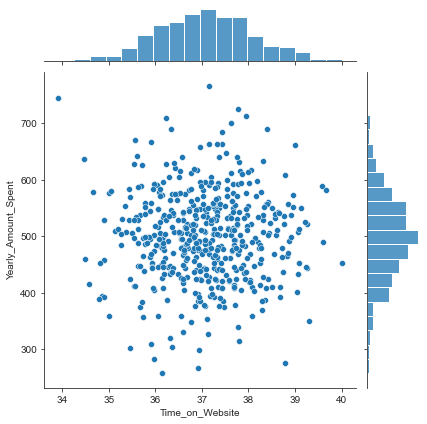

In [92]:
sns.set_palette("tab10")
sns.set_style('ticks')
sns.jointplot(x = 'Time_on_Website', y = 'Yearly_Amount_Spent', data = df)
plt.show()

## Create a joint plot with 'Time_on_App'

### This one looks stronger correlation than Time_on_Website

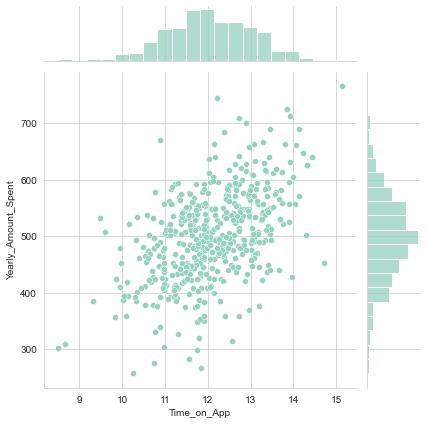

In [83]:
sns.jointplot(data = df, x = 'Time_on_App', y = 'Yearly_Amount_Spent')
plt.show()

## Create Pair Plot 

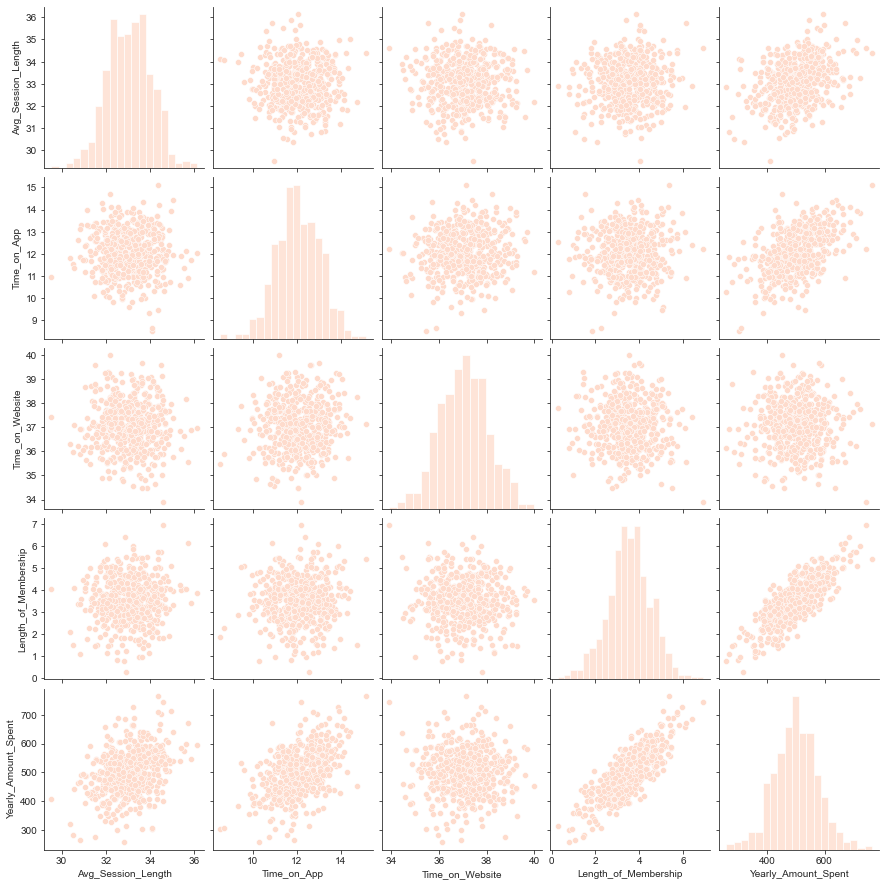

In [90]:
sns.pairplot(df)
plt.show()

## Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership to visualize the relationship


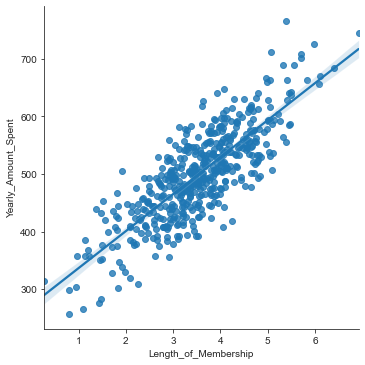

In [96]:
sns.lmplot(data = df, x = 'Length_of_Membership', y = 'Yearly_Amount_Spent')
plt.show()

## Create X and Y variables 

In [97]:
X = df.iloc[:, 3:-1]
X.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [98]:
y = df.iloc[:, -1]
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly_Amount_Spent, dtype: float64

## Create Train Test split 

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 85)
print('X_train shape ', X_train.shape)
print('X_test shape ', X_test.shape)
print('y_train shape ', y_train.shape)
print('y_test shape ', y_test.shape)

X_train shape  (350, 4)
X_test shape  (150, 4)
y_train shape  (350,)
y_test shape  (150,)


## Create the Model 

In [100]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Prediction and result as Graph

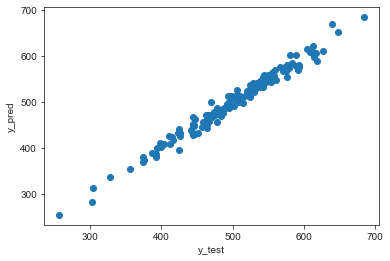

In [102]:
y_pred = lm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Coefficient and Intercept 

In [105]:
print("coefficient :- \n ",lm.coef_)
print("intercept :- \n ",lm.intercept_)

coefficient :- 
  [26.08163249 39.18778762  0.40460005 61.41777824]
intercept :- 
  -1067.3824276105229


## RMSE- Root Mean Square error

In [106]:
from sklearn import metrics
print('RMSE : ', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

RMSE :  10.57


## Create a DIST plot 

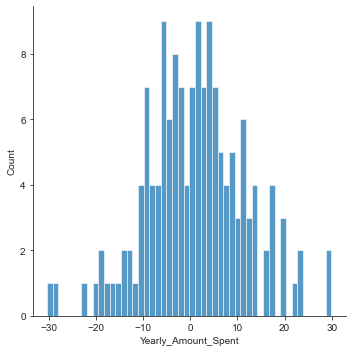

In [109]:
sns.displot((y_test-y_pred), bins = 50)
plt.show()

## Final Question
### ** Q8. Based on coefficients interpret company should focus more on their mobile app or on their website**


In [110]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,25.947252
Time_on_App,39.066821
Time_on_Website,0.682530
Length_of_Membership,61.334694


## ** How can you interpret these coefficients? **
### Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 26.08 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 39.18 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.40 total dollars spent.
- Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.41 total dollars spent.
##### *Clearly Time On App leads to higher revenue conversion – hence company should focus on App rather than website. Whether company should shutdown the website depends solely on management take on revenue through website *
